## Effect of batch size notebook

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter

pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
project_dir = globals()["_dh"][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, "..", "..", "..", "..")))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_PATH,
)
from experiments.utils.parser import Parser

In [5]:
series = 19
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(NODE_PROFILING_RESULTS_PATH, "series", str(series))
loader = Parser(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=True
)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

TypeError: __init__() missing 1 required positional argument: 'model_name'

In [6]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config)

NameError: name 'loader' is not defined

In [7]:
results.columns

NameError: name 'results' is not defined

In [8]:
experiment_ids = key_config_df[key_config_df["model_variant"] == "resnet18"][
    "experiment_id"
].tolist()
metadata_columns = ["model_variant", "max_batch_size", "cpu_request"]
results_columns = [
    "model_latencies_p99",
    "cpu_usage_count_avg",
    "model_latencies_avg",
    "cpu_throttled_count_max",
    "cpu_usage_rate_max",
]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)
display(output)
ax = output.plot.bar(x="cpu_request", y=["model_latencies_p99", "model_latencies_avg"])
ax.set_xlabel("CPU Allocation (Cores)")
ax.set_ylabel("Latency (seconds)")

NameError: name 'key_config_df' is not defined

In [9]:
experiment_ids = key_config_df[key_config_df["model_variant"] == "resnet18"][
    "experiment_id"
].tolist()
metadata_columns = ["model_variant", "max_batch_size", "cpu_request"]
results_columns = ["model_latencies_p99", "cpu_usage_count_avg", "model_latencies_avg"]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)
display(output)
ax = output.plot.bar(x="cpu_request", y=["model_latencies_p99", "model_latencies_avg"])
ax.set_xlabel("CPU Allocation (Cores)")
ax.set_ylabel("Latency (seconds)")

NameError: name 'key_config_df' is not defined

In [10]:
experiment_ids = key_config_df[key_config_df["model_variant"] == "resnet18"][
    "experiment_id"
].tolist()
metadata_columns = ["model_variant", "max_batch_size", "cpu_request"]
results_columns = ["model_latencies_p99", "cpu_usage_count_avg", "model_latencies_avg"]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
).sort_values(["cpu_request", "max_batch_size"])
display(output)
ax = output.plot.bar(
    x="max_batch_size", y=["model_latencies_p99", "model_latencies_avg"]
)
ax.set_xlabel("Max batch size")
ax.set_ylabel("Latency (seconds)")

NameError: name 'key_config_df' is not defined

In [11]:
from ipaddress import collapse_addresses
import numpy as np
import matplotlib.pyplot as plt

# model_vairant = 'resnet152'
experiment_ids = key_config_df[key_config_df["model_variant"] == "resnet18"][
    "experiment_id"
].tolist()
metadata_columns = ["model_variant", "max_batch_size", "cpu_request"]
results_columns = ["model_latencies_p99", "cpu_usage_count_avg", "model_latencies_avg"]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)

display(output)

output["max_batch_size_num"] = output["max_batch_size"].replace(
    {
        1: 0,
        2: 1,
        4: 2,
        8: 3,
        16: 4,
    }
)

output["cpu_request_num"] = output["cpu_request"].replace(
    {
        1: 0,
        2: 1,
        4: 2,
        8: 3,
        16: 4,
    }
)

display(output)

# setup the figure and axes
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(111, projection="3d")

dx = 0.25
dy = 0.25

# colors = ['skyblue', 'g', 'r', 'pink', 'coral']

y = output["max_batch_size_num"]
x = output["cpu_request_num"]
top = output["model_latencies_avg"]
z = np.zeros_like(top)

ax1.bar3d(x, y, z, dx, dy, top, shade=True)
ax1.set_title("Batch and Model-variant effect on P99 Latency", size=17)
ax1.set_xlabel("CPU Request (Cores)", size=17)
ax1.set_ylabel("Batch Size", size=17)
ax1.set_zlabel("Latency P99 (Seconds)", size=17)
# ax1.set_yticklabels(['resnet18', 'resnet50', 'resnet152'])
# ax1.set_ylim(0, 1)
# experiment_ids
# ax1.view_init(120, 120)


plt.show()

NameError: name 'key_config_df' is not defined

In [12]:
experiment_ids = key_config_df[key_config_df["model_variant"] == "resnet18"][
    "experiment_id"
].tolist()
metadata_columns = ["model_variant", "max_batch_size", "cpu_request"]
results_columns = [
    "model_latencies_p99",
    "cpu_usage_count_avg",
    "model_latencies_avg",
    "memory_usage_max",
]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
).sort_values(["cpu_request", "max_batch_size"])
display(output)
# ax = output.plot.bar(x='max_batch_size', y=['model_latencies_p99', 'model_latencies_avg'])
# ax.set_xlabel("Max batch size")
# ax.set_ylabel("Latency (seconds)")

NameError: name 'key_config_df' is not defined

,model_variant,max_batch_size,cpu_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg,model_variant_num
0,resnet18,1,1,4.880700,91.027312,3.152761,18
1,resnet18,1,2,3.081147,71.084762,1.795392,18
2,resnet18,1,4,0.994883,30.833773,0.385965,18
3,resnet18,1,8,0.403473,22.530539,0.120931,18
4,resnet18,1,16,0.288452,17.617062,0.109956,18
5,resnet34,1,1,9.215283,179.745532,5.561956,34
6,resnet34,1,2,6.526633,207.968208,4.044765,34
7,resnet34,1,4,2.139671,40.798654,0.847622,34
8,resnet34,1,8,1.158158,26.725170,0.216683,34
9,resnet34,1,16,0.244219,27.183892,0.121072,34


Text(0, 0.5, 'Latency (seconds)')

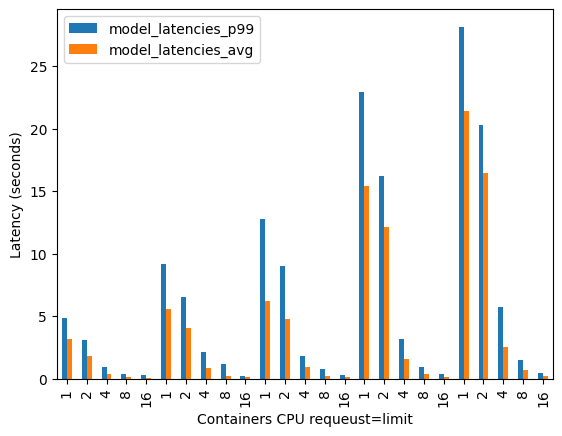

In [16]:
experiment_ids = key_config_df[key_config_df["max_batch_size"] == 1][
    "experiment_id"
].tolist()
metadata_columns = ["model_variant", "max_batch_size", "cpu_request"]
results_columns = ["model_latencies_p99", "cpu_usage_count_avg", "model_latencies_avg"]
output = (
    loader.table_maker(
        experiment_ids=experiment_ids,
        metadata_columns=metadata_columns,
        results_columns=results_columns,
    )
    .sort_values(["cpu_request", "max_batch_size"])
    .sort_values(by=["model_variant", "cpu_request"])
)

output["model_variant_num"] = output["model_variant"].replace(
    {
        "resnet18": 18,
        "resnet34": 34,
        "resnet50": 50,
        "resnet101": 101,
        "resnet152": 152,
    }
)

output = output.sort_values(["cpu_request", "max_batch_size"]).sort_values(
    by=["model_variant_num", "cpu_request"]
)

display(output)
ax = output.plot.bar(x="cpu_request", y=["model_latencies_p99", "model_latencies_avg"])
ax.set_xlabel("Containers CPU requeust=limit")
ax.set_ylabel("Latency (seconds)")

TypeError: from_bounds() missing 2 required positional arguments: 'width' and 'height'

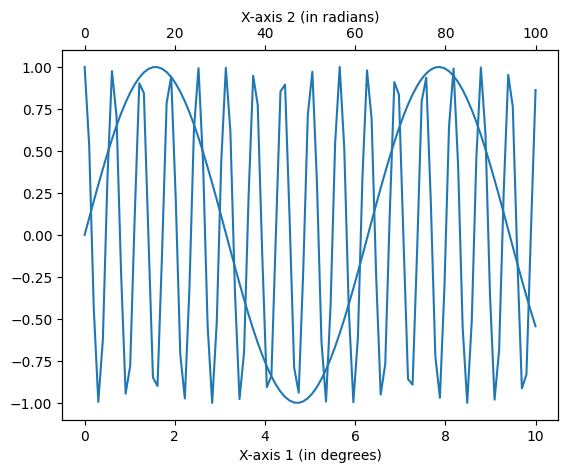

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x1 = np.linspace(0, 10, 100)
y1 = np.sin(x1)
x2 = np.linspace(0, 100, 100)
y2 = np.cos(x2)

# Create the figure and axis objects
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()

# Plot data on the first x-axis
ax1.plot(x1, y1, label="Sin(x)")
ax1.set_xlabel("X-axis 1 (in degrees)")

# Plot data on the second x-axis
ax2.plot(x2, y2, label="Cos(x)")
ax2.set_xlabel("X-axis 2 (in radians)")


# Add a legend
plt.legend()

# Display the plot
plt.show()